In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [12]:
dt=pd.read_csv(r"C:\Users\rajdi\OneDrive\Desktop\JIS\mynotebookpython\HealthApp_2k.log_structured.csv")
dt.Component.value_counts()

Step_LSC                       710
Step_SPUtils                   494
Step_ExtSDM                    482
Step_StandReportReceiver       171
HiH_HiSyncControl               42
Step_StandStepCounter           19
HiH_DataStatManager             17
HiH_HiHealthDataInsertStore     11
HiH_                            10
HiH_HiHealthBinder               9
HiH_HiAppUtil                    8
Step_FlushableStepDataCache      8
HiH_HiBroadcastUtil              5
Step_StandStepDataManager        5
HiH_ListenerManager              2
HiH_HiSyncUtil                   2
Step_HGNH                        2
Step_ScreenUtil                  1
Step_DataCache                   1
Step_NotificationUtil            1
Name: Component, dtype: int64

In [13]:
dt['Date']=dt["Time"].str.split("-").str[0]
dt['Date']=pd.to_datetime(dt['Date']).dt.date
dt['Timestamp']=dt["Time"].str.split("-").str[1]
dt['Timestamp']=dt['Timestamp'].str[:-4]


In [8]:
pd.set_option('display.max_rows',None)
dt

,LineId,Time,Component,Pid,Content,EventId,EventTemplate,Date,Timestamp
0,1,20171223-22:15:29:606,Step_LSC,30002312,onStandStepChanged 3579,E42,onStandStepChanged <*>,2017-12-23,22:15:29
1,2,20171223-22:15:29:615,Step_LSC,30002312,onExtend:1514038530000 14 0 4,E39,onExtend:<*> <*> <*> <*>,2017-12-23,22:15:29
2,3,20171223-22:15:29:633,Step_StandReportReceiver,30002312,onReceive action: android.intent.action.SCREEN_ON,E41,onReceive action: android.intent.action.SCREEN_ON,2017-12-23,22:15:29
3,4,20171223-22:15:29:635,Step_LSC,30002312,processHandleBroadcastAction action:android.in...,E43,processHandleBroadcastAction action:android.in...,2017-12-23,22:15:29
4,5,20171223-22:15:29:635,Step_StandStepCounter,30002312,flush sensor data,E12,flush sensor data,2017-12-23,22:15:29
5,6,20171223-22:15:29:635,Step_SPUtils,30002312,getTodayTotalDetailSteps = 1514038440000##699...,E22,getTodayTotalDetailSteps = <*>##<*>##<*>##<*>#...,2017-12-23,22:15:29
6,7,20171223-22:15:29:636,Step_SPUtils,30002312,setTodayTotalDetailSteps=1514038440000##7007##...,E58,setTodayTotalDetailSteps=<*>,2017-12-23,22:15:29
7,8,20171223-22:15:29:636,Step_LSC,30002312,onStandStepChanged 3579,E42,onStandStepChanged <*>,2017-12-23,22:15:29
8,9,20171223-22:15:29:645,Step_ExtSDM,30002312,calculateCaloriesWithCache totalCalories=126775,E4,calculateCaloriesWithCache totalCalories=<*>,2017-12-23,22:15:29
9,10,20171223-22:15:29:648,Step_ExtSDM,30002312,calculateAltitudeWithCache totalAltitude=240,E3,calculateAltitudeWithCache totalAltitude=<*>,2017-12-23,22:15:29


In [123]:
dt['Cont'] = dt['Content'].str.extract(r'([^0-9=:]+)')


In [119]:
import re
new_cont=[]
log=[]
for ct in dt.Content:
    new_cont.append("".join(re.findall(r'[^\d+#=: ]',ct)))
    log.append("".join(re.findall(r"[0-9# $]",ct)))
dt['Cont']=new_cont
dt['Cont_log']=log


In [124]:
dt.Cont.value_counts()

onExtend                                                                      273
onStandStepChanged                                                            260
 getTodayTotalDetailSteps                                                     242
setTodayTotalDetailSteps                                                      241
calculateCaloriesWithCache totalCalories                                      241
calculateAltitudeWithCache totalAltitude                                      241
processHandleBroadcastAction action                                           161
REPORT                                                                        136
onReceive action                                                               34
flush sensor data                                                              17
new date                                                                       17
getBinderPackageName packageName                                                8
getTodaySportDat

In [145]:
#Creating dataframe to get only calories & total altitude
stat=dt[dt['Cont'].isin(['calculateCaloriesWithCache totalCalories',  'calculateAltitudeWithCache totalAltitude'])]
stat

,LineId,Time,Component,Pid,Content,EventId,EventTemplate,Date,Timestamp,Cont,Cont_log
8,9,20171223-22:15:29:645,Step_ExtSDM,30002312,calculateCaloriesWithCache totalCalories=126775,E4,calculateCaloriesWithCache totalCalories=<*>,2017-12-23,22:15:29,calculateCaloriesWithCache totalCalories,126775
9,10,20171223-22:15:29:648,Step_ExtSDM,30002312,calculateAltitudeWithCache totalAltitude=240,E3,calculateAltitudeWithCache totalAltitude=<*>,2017-12-23,22:15:29,calculateAltitudeWithCache totalAltitude,240
17,18,20171223-22:15:29:959,Step_ExtSDM,30002312,calculateCaloriesWithCache totalCalories=126797,E4,calculateCaloriesWithCache totalCalories=<*>,2017-12-23,22:15:29,calculateCaloriesWithCache totalCalories,126797
18,19,20171223-22:15:29:962,Step_ExtSDM,30002312,calculateAltitudeWithCache totalAltitude=240,E3,calculateAltitudeWithCache totalAltitude=<*>,2017-12-23,22:15:29,calculateAltitudeWithCache totalAltitude,240
24,25,20171223-22:15:30:639,Step_ExtSDM,30002312,calculateCaloriesWithCache totalCalories=126818,E4,calculateCaloriesWithCache totalCalories=<*>,2017-12-23,22:15:30,calculateCaloriesWithCache totalCalories,126818
25,26,20171223-22:15:30:641,Step_ExtSDM,30002312,calculateAltitudeWithCache totalAltitude=240,E3,calculateAltitudeWithCache totalAltitude=<*>,2017-12-23,22:15:30,calculateAltitudeWithCache totalAltitude,240
31,32,20171223-22:15:31:157,Step_ExtSDM,30002312,calculateCaloriesWithCache totalCalories=126861,E4,calculateCaloriesWithCache totalCalories=<*>,2017-12-23,22:15:31,calculateCaloriesWithCache totalCalories,126861
32,33,20171223-22:15:31:160,Step_ExtSDM,30002312,calculateAltitudeWithCache totalAltitude=240,E3,calculateAltitudeWithCache totalAltitude=<*>,2017-12-23,22:15:31,calculateAltitudeWithCache totalAltitude,240
38,39,20171223-22:15:32:156,Step_ExtSDM,30002312,calculateCaloriesWithCache totalCalories=126882,E4,calculateCaloriesWithCache totalCalories=<*>,2017-12-23,22:15:32,calculateCaloriesWithCache totalCalories,126882
39,40,20171223-22:15:32:162,Step_ExtSDM,30002312,calculateAltitudeWithCache totalAltitude=240,E3,calculateAltitudeWithCache totalAltitude=<*>,2017-12-23,22:15:32,calculateAltitudeWithCache totalAltitude,240


In [1]:
stat['Cont'] = stat['Cont'].str.split(' ').str[1]

In [146]:
# Getting Component assosiated with movement done by user
stat['Component'].value_counts()

Step_ExtSDM    482
Name: Component, dtype: int64

In [181]:
stat

,LineId,Time,Component,Pid,Content,EventId,EventTemplate,Date,Timestamp,Cont,Cont_log
8,9,20171223-22:15:29:645,Step_ExtSDM,30002312,calculateCaloriesWithCache totalCalories=126775,E4,calculateCaloriesWithCache totalCalories=<*>,2017-12-23,22:15:29,totalCalories,126775
9,10,20171223-22:15:29:648,Step_ExtSDM,30002312,calculateAltitudeWithCache totalAltitude=240,E3,calculateAltitudeWithCache totalAltitude=<*>,2017-12-23,22:15:29,totalAltitude,240
17,18,20171223-22:15:29:959,Step_ExtSDM,30002312,calculateCaloriesWithCache totalCalories=126797,E4,calculateCaloriesWithCache totalCalories=<*>,2017-12-23,22:15:29,totalCalories,126797
18,19,20171223-22:15:29:962,Step_ExtSDM,30002312,calculateAltitudeWithCache totalAltitude=240,E3,calculateAltitudeWithCache totalAltitude=<*>,2017-12-23,22:15:29,totalAltitude,240
24,25,20171223-22:15:30:639,Step_ExtSDM,30002312,calculateCaloriesWithCache totalCalories=126818,E4,calculateCaloriesWithCache totalCalories=<*>,2017-12-23,22:15:30,totalCalories,126818
25,26,20171223-22:15:30:641,Step_ExtSDM,30002312,calculateAltitudeWithCache totalAltitude=240,E3,calculateAltitudeWithCache totalAltitude=<*>,2017-12-23,22:15:30,totalAltitude,240
31,32,20171223-22:15:31:157,Step_ExtSDM,30002312,calculateCaloriesWithCache totalCalories=126861,E4,calculateCaloriesWithCache totalCalories=<*>,2017-12-23,22:15:31,totalCalories,126861
32,33,20171223-22:15:31:160,Step_ExtSDM,30002312,calculateAltitudeWithCache totalAltitude=240,E3,calculateAltitudeWithCache totalAltitude=<*>,2017-12-23,22:15:31,totalAltitude,240
38,39,20171223-22:15:32:156,Step_ExtSDM,30002312,calculateCaloriesWithCache totalCalories=126882,E4,calculateCaloriesWithCache totalCalories=<*>,2017-12-23,22:15:32,totalCalories,126882
39,40,20171223-22:15:32:162,Step_ExtSDM,30002312,calculateAltitudeWithCache totalAltitude=240,E3,calculateAltitudeWithCache totalAltitude=<*>,2017-12-23,22:15:32,totalAltitude,240


In [179]:
# Checking calories & Total altitude covered by a user in diffrent timeframe
New_stat=dt[dt['Cont'].isin([' getTodayTotalDetailSteps ','setTodayTotalDetailSteps' , 'calculateCaloriesWithCache totalCalories',  'calculateAltitudeWithCache totalAltitude'])]

In [180]:
New_stat

,LineId,Time,Component,Pid,Content,EventId,EventTemplate,Date,Timestamp,Cont,Cont_log
5,6,20171223-22:15:29:635,Step_SPUtils,30002312,getTodayTotalDetailSteps = 1514038440000##699...,E22,getTodayTotalDetailSteps = <*>##<*>##<*>##<*>#...,2017-12-23,22:15:29,getTodayTotalDetailSteps,1514038440000##6993##548365##8661##12266##2...
6,7,20171223-22:15:29:636,Step_SPUtils,30002312,setTodayTotalDetailSteps=1514038440000##7007##...,E58,setTodayTotalDetailSteps=<*>,2017-12-23,22:15:29,setTodayTotalDetailSteps,1514038440000##7007##548365##8661##12361##2717...
8,9,20171223-22:15:29:645,Step_ExtSDM,30002312,calculateCaloriesWithCache totalCalories=126775,E4,calculateCaloriesWithCache totalCalories=<*>,2017-12-23,22:15:29,calculateCaloriesWithCache totalCalories,126775
9,10,20171223-22:15:29:648,Step_ExtSDM,30002312,calculateAltitudeWithCache totalAltitude=240,E3,calculateAltitudeWithCache totalAltitude=<*>,2017-12-23,22:15:29,calculateAltitudeWithCache totalAltitude,240
15,16,20171223-22:15:29:950,Step_SPUtils,30002312,getTodayTotalDetailSteps = 1514038440000##700...,E22,getTodayTotalDetailSteps = <*>##<*>##<*>##<*>#...,2017-12-23,22:15:29,getTodayTotalDetailSteps,1514038440000##7007##548365##8661##12361##2...
16,17,20171223-22:15:29:950,Step_SPUtils,30002312,setTodayTotalDetailSteps=1514038440000##7008##...,E58,setTodayTotalDetailSteps=<*>,2017-12-23,22:15:29,setTodayTotalDetailSteps,1514038440000##7008##548365##8661##12456##2717...
17,18,20171223-22:15:29:959,Step_ExtSDM,30002312,calculateCaloriesWithCache totalCalories=126797,E4,calculateCaloriesWithCache totalCalories=<*>,2017-12-23,22:15:29,calculateCaloriesWithCache totalCalories,126797
18,19,20171223-22:15:29:962,Step_ExtSDM,30002312,calculateAltitudeWithCache totalAltitude=240,E3,calculateAltitudeWithCache totalAltitude=<*>,2017-12-23,22:15:29,calculateAltitudeWithCache totalAltitude,240
22,23,20171223-22:15:30:632,Step_SPUtils,30002312,getTodayTotalDetailSteps = 1514038440000##700...,E22,getTodayTotalDetailSteps = <*>##<*>##<*>##<*>#...,2017-12-23,22:15:30,getTodayTotalDetailSteps,1514038440000##7008##548365##8661##12456##2...
23,24,20171223-22:15:30:632,Step_SPUtils,30002312,setTodayTotalDetailSteps=1514038440000##7009##...,E58,setTodayTotalDetailSteps=<*>,2017-12-23,22:15:30,setTodayTotalDetailSteps,1514038440000##7009##548365##8661##12551##2717...


In [150]:
# Here we got Component Step_Sputils tells about its log whats happening but Compenet Step_ExtSDM tells abput Metrics its 
# Calories Burn & total altitude acheived by a user throuhout a day
New_stat['Component'].value_counts()

Step_SPUtils    483
Step_ExtSDM     482
Name: Component, dtype: int64

In [4]:
# Changing Data type of Cont_log as it is in Ojbect type making it integer
stat['Cont_log']=stat['Cont_log'].astype('Int64')

In [163]:
# Using stat dataset to get User Consumption
stat.groupby(['Date','Cont'])['Cont_log'].max()
# As we can see here on 24 December thers is no activity done by a user & on 23 December user burn their total calories 131208
# Througout a day


Date        Cont                                    
2017-12-23  calculateAltitudeWithCache totalAltitude       240
            calculateCaloriesWithCache totalCalories    131208
2017-12-24  calculateAltitudeWithCache totalAltitude         0
            calculateCaloriesWithCache totalCalories         0
Name: Cont_log, dtype: Int64

In [261]:
#here there is only 
stat['Hour']=stat['Timestamp'].str.split(":").str[0]

C:\Users\surkanor\AppData\Local\Temp\ipykernel_35784\3450051605.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stat['Hour']=stat['Timestamp'].str.split(":").str[0]


In [202]:
stat.Hour.value_counts()
#Most of the activity done at 10 pm or by 11 & before 1AM  

22    298
23    136
0      48
Name: Hour, dtype: int64

In [257]:
# MAx calories burn by a user is 131208 by 11:14 pm  after this user stop intense workout as there is no change in calories
# & Altitude is intact throughout the workout & user movement were accounted till 11:57 pm on 23 December
stat.Cont_log.max() 

131208

In [262]:
stat[stat.Cont_log==131208]

,LineId,Time,Component,Pid,Content,EventId,EventTemplate,Date,Timestamp,Cont,Cont_log,Hour
1428,1429,20171223-23:14:48:922,Step_ExtSDM,30002312,calculateCaloriesWithCache totalCalories=131208,E4,calculateCaloriesWithCache totalCalories=<*>,2017-12-23,23:14:48,totalCalories,131208,23
1435,1436,20171223-23:14:52:421,Step_ExtSDM,30002312,calculateCaloriesWithCache totalCalories=131208,E4,calculateCaloriesWithCache totalCalories=<*>,2017-12-23,23:14:52,totalCalories,131208,23
1443,1444,20171223-23:16:23:420,Step_ExtSDM,30002312,calculateCaloriesWithCache totalCalories=131208,E4,calculateCaloriesWithCache totalCalories=<*>,2017-12-23,23:16:23,totalCalories,131208,23
1455,1456,20171223-23:17:41:3,Step_ExtSDM,30002312,calculateCaloriesWithCache totalCalories=131208,E4,calculateCaloriesWithCache totalCalories=<*>,2017-12-23,23:17:,totalCalories,131208,23
1463,1464,20171223-23:17:41:309,Step_ExtSDM,30002312,calculateCaloriesWithCache totalCalories=131208,E4,calculateCaloriesWithCache totalCalories=<*>,2017-12-23,23:17:41,totalCalories,131208,23
1475,1476,20171223-23:17:42:1,Step_ExtSDM,30002312,calculateCaloriesWithCache totalCalories=131208,E4,calculateCaloriesWithCache totalCalories=<*>,2017-12-23,23:17:,totalCalories,131208,23
1482,1483,20171223-23:17:42:397,Step_ExtSDM,30002312,calculateCaloriesWithCache totalCalories=131208,E4,calculateCaloriesWithCache totalCalories=<*>,2017-12-23,23:17:42,totalCalories,131208,23
1490,1491,20171223-23:19:20:456,Step_ExtSDM,30002312,calculateCaloriesWithCache totalCalories=131208,E4,calculateCaloriesWithCache totalCalories=<*>,2017-12-23,23:19:20,totalCalories,131208,23
1496,1497,20171223-23:19:21:455,Step_ExtSDM,30002312,calculateCaloriesWithCache totalCalories=131208,E4,calculateCaloriesWithCache totalCalories=<*>,2017-12-23,23:19:21,totalCalories,131208,23
1505,1506,20171223-23:23:15:466,Step_ExtSDM,30002312,calculateCaloriesWithCache totalCalories=131208,E4,calculateCaloriesWithCache totalCalories=<*>,2017-12-23,23:23:15,totalCalories,131208,23


In [2]:
# Creating New Dataframe caters only total calories burnt by a user
cal= stat[stat['Cont']=='totalCalories']
Getting Difference from previous calories to current calories
cal['Diff_calories']= cal['Cont_log'] - cal['Cont_log'].shift(1)

<Axes: xlabel='Hour', ylabel='Cont_log'>

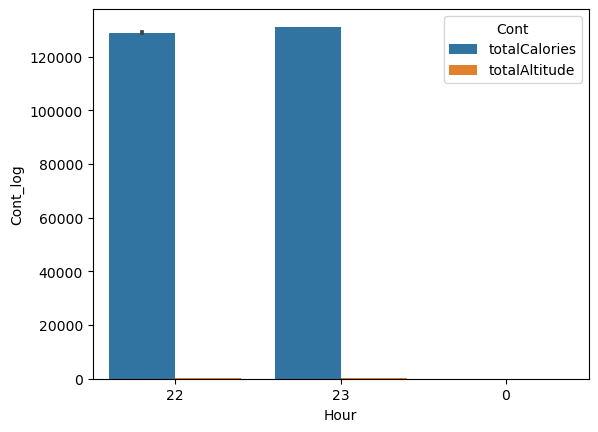

In [263]:
# Total calories burnt during different time stamp
sns.barplot(x=stat['Hour'],y=stat['Cont_log'],hue=stat['Cont'])

In [215]:
cal

,LineId,Time,Component,Pid,Content,EventId,EventTemplate,Date,Timestamp,Cont,Cont_log,Hour,Diff_calories
8,9,20171223-22:15:29:645,Step_ExtSDM,30002312,calculateCaloriesWithCache totalCalories=126775,E4,calculateCaloriesWithCache totalCalories=<*>,2017-12-23,22:15:29,totalCalories,126775,22,<NA>
17,18,20171223-22:15:29:959,Step_ExtSDM,30002312,calculateCaloriesWithCache totalCalories=126797,E4,calculateCaloriesWithCache totalCalories=<*>,2017-12-23,22:15:29,totalCalories,126797,22,22
24,25,20171223-22:15:30:639,Step_ExtSDM,30002312,calculateCaloriesWithCache totalCalories=126818,E4,calculateCaloriesWithCache totalCalories=<*>,2017-12-23,22:15:30,totalCalories,126818,22,21
31,32,20171223-22:15:31:157,Step_ExtSDM,30002312,calculateCaloriesWithCache totalCalories=126861,E4,calculateCaloriesWithCache totalCalories=<*>,2017-12-23,22:15:31,totalCalories,126861,22,43
38,39,20171223-22:15:32:156,Step_ExtSDM,30002312,calculateCaloriesWithCache totalCalories=126882,E4,calculateCaloriesWithCache totalCalories=<*>,2017-12-23,22:15:32,totalCalories,126882,22,21
45,46,20171223-22:15:32:656,Step_ExtSDM,30002312,calculateCaloriesWithCache totalCalories=126904,E4,calculateCaloriesWithCache totalCalories=<*>,2017-12-23,22:15:32,totalCalories,126904,22,22
52,53,20171223-22:15:33:148,Step_ExtSDM,30002312,calculateCaloriesWithCache totalCalories=126925,E4,calculateCaloriesWithCache totalCalories=<*>,2017-12-23,22:15:33,totalCalories,126925,22,21
59,60,20171223-22:15:33:658,Step_ExtSDM,30002312,calculateCaloriesWithCache totalCalories=126947,E4,calculateCaloriesWithCache totalCalories=<*>,2017-12-23,22:15:33,totalCalories,126947,22,22
69,70,20171223-22:15:35:20,Step_ExtSDM,30002312,calculateCaloriesWithCache totalCalories=126989,E4,calculateCaloriesWithCache totalCalories=<*>,2017-12-23,22:15:3,totalCalories,126989,22,42
80,81,20171223-22:15:35:104,Step_ExtSDM,30002312,calculateCaloriesWithCache totalCalories=126989,E4,calculateCaloriesWithCache totalCalories=<*>,2017-12-23,22:15:35,totalCalories,126989,22,0


In [220]:
# sns.barplot(x=cal['Hour'],y=cal['Diff_calories'])
cal.groupby('Hour')['Diff_calories'].sum()

Hour
0     -131208
22       3898
23        535
Name: Diff_calories, dtype: Int64

In [223]:
alt['Cont_log'].unique()

<IntegerArray>
[240, 0]
Length: 2, dtype: Int64